In [4]:
import pandas as pd

%load_ext autoreload
%autoreload 2

In [5]:
import dill
from Bio import SeqIO
from Bio.Seq import Seq
from freqs import Freqs, load_freqs, dump_freqs, calculate_pressure

%load_ext autoreload
%autoreload 2

In [6]:
ref_fp = "./data/refseq.csv"
ref_df = pd.read_csv(ref_fp)
ref_df = ref_df[ref_df["genetic_code"]==11]
print(len(ref_df))
ref_df.head()

5710


,acc,ftp,organism_name,genetic_code
0,GCF_000010525.1,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,Azorhizobium caulinodans ORS 571,11
1,GCF_000007365.1,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,Buchnera aphidicola str. Sg (Schizaphis graminum),11
2,GCF_000007725.1,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,Buchnera aphidicola str. Bp (Baizongia pistaciae),11
3,GCF_000009605.1,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,Buchnera aphidicola str. APS (Acyrthosiphon pi...,11
4,GCF_000090965.1,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,Buchnera aphidicola BCc,11


## summarize pressure(02/06)

In [1]:
def find_altstop(bicodon, phase):
    if phase == "+1":
        codon = bicodon[1:4]
    elif phase == "+2":
        codon = bicodon[2:5]
    elif phase == "-1":
        codon = str(Seq(bicodon[1:4]).reverse_complement())
    elif phase == "-2":
        codon = str(Seq(bicodon[2:5]).reverse_complement())
    
    if codon in ["TAA", "TAG", "TGA"]:
        return codon
    else:
        return ""

In [7]:
%%time

lstlst = []
for acc in ref_df["acc"]:
    fp = "./data/pressure/{}.csv".format(acc)
    df = pd.read_csv(fp)
    lstlst.append(df["pres"].values)
    
all_df = pd.DataFrame(lstlst, columns=df["bicodon"].values)

(5710, 4096)
CPU times: user 43.6 s, sys: 4.96 s, total: 48.6 s
Wall time: 48.5 s


In [9]:
print(all_df.shape)
all_df.head()

(5710, 4096)


,TTTTTT,TTTTTC,TTTTTA,TTTTTG,TTTTCT,TTTTCC,TTTTCA,TTTTCG,TTTTAT,TTTTAC,...,GGGGCA,GGGGCG,GGGGAT,GGGGAC,GGGGAA,GGGGAG,GGGGGT,GGGGGC,GGGGGA,GGGGGG
0,0.810666,0.462004,3.813721,1.265695,2.626441,2.161223,3.704301,1.235053,0.491033,0.697217,...,1.751594,1.605227,1.017525,0.549288,0.845272,0.750980,0.263485,0.326762,1.020652,0.407706
1,1.033693,0.957930,1.121940,0.953634,1.150637,0.983079,1.138685,0.764617,1.005291,1.067690,...,0.761211,2.048661,0.916962,0.000000,0.290717,1.165634,0.676983,1.390184,0.457799,3.309963
2,1.015438,1.254621,1.115589,1.176146,1.049482,1.010968,1.046376,1.260666,1.028917,0.828946,...,0.790983,0.420702,0.580362,0.720104,0.767893,0.336975,0.820445,0.474192,0.622243,2.714125
3,1.034599,1.066175,1.165013,0.776336,1.202612,0.898454,1.030083,0.988204,1.052512,0.770693,...,0.857884,1.667021,0.341321,1.682207,1.439027,0.961694,0.810549,1.263355,0.489620,3.462420
4,1.009259,1.081545,1.027762,1.069277,1.285998,0.852517,0.846513,0.945161,1.013407,0.786975,...,1.054340,2.487847,0.263989,0.000000,1.739111,0.000000,1.018687,3.484556,1.091156,6.585811


In [10]:
stat_df = all_df.describe().T
stat_df.head()

,count,mean,std,min,25%,50%,75%,max
TTTTTT,5710.0,1.406304,5.388102,0.0,0.621378,0.767329,0.971691,238.753739
TTTTTC,5710.0,1.021666,0.402240,0.0,0.752462,1.033372,1.257476,3.122408
TTTTTA,5710.0,2.705516,10.932652,0.0,1.101477,1.434196,2.221359,564.353989
TTTTTG,5710.0,1.480377,1.501629,0.0,0.859170,1.105818,1.583203,37.874822
TTTTCT,5710.0,2.025797,2.556118,0.0,1.030331,1.239174,1.995594,62.739935


In [21]:
#top_df = stat_df.sort_values(by="50%").head(20).copy()
for phase in ["+1", "+2", "-1", "-2"]:
    stat_df[phase] = stat_df.index.map(lambda x:find_altstop(x, phase))
stat_df.sort_values(by="50%").head(20)

,count,mean,std,min,25%,50%,75%,max,+1,+2,-1,-2
GCTAGC,5710.0,0.386276,0.340542,0.0,0.143418,0.264852,0.544916,2.774958,,TAG,TAG,
ACTAGC,5710.0,0.422588,0.351437,0.0,0.162676,0.297858,0.609114,2.311555,,TAG,TAG,
CCTAGC,5710.0,0.432979,0.378691,0.0,0.156869,0.299869,0.636114,3.008243,,TAG,TAG,
TCTAGC,5710.0,0.432496,0.368610,0.0,0.161916,0.307087,0.646428,3.660416,,TAG,TAG,
CCCCCC,5710.0,0.532448,1.393730,0.0,0.189951,0.331589,0.587245,71.561220,,,,
GGGGGT,5710.0,0.382750,0.214866,0.0,0.250376,0.340489,0.462863,3.601946,,,,
ATTAGC,5710.0,0.424454,0.304448,0.0,0.159106,0.341583,0.667641,2.723406,,TAG,TAA,
GTTAGC,5710.0,0.414839,0.290666,0.0,0.172243,0.343537,0.620797,2.968872,,TAG,TAA,
CTCCCG,5710.0,0.455275,0.468234,0.0,0.210644,0.365108,0.576259,11.081779,,,,
TATAGG,5710.0,0.454180,0.373535,0.0,0.198620,0.368426,0.612357,4.664436,,TAG,,


In [24]:
stat_df.sort_values(by="50%").to_csv("./data/bicodon.tsv", sep='\t')

In [17]:
top_df

,count,mean,std,min,25%,50%,75%,max,+1,+2,-1,-2
GGGGGT,5710.0,0.382750,0.214866,0.0,0.250376,0.340489,0.462863,3.601946,,,,
GCTAGC,5710.0,0.386276,0.340542,0.0,0.143418,0.264852,0.544916,2.774958,,TAG,TAG,
CCCCCG,5710.0,0.492340,0.549240,0.0,0.280477,0.412564,0.574233,16.471004,,,,
CTCCCG,5710.0,0.455275,0.468234,0.0,0.210644,0.365108,0.576259,11.081779,,,,
CCCCCC,5710.0,0.532448,1.393730,0.0,0.189951,0.331589,0.587245,71.561220,,,,
GGGGGC,5710.0,0.480933,0.261030,0.0,0.310653,0.428381,0.592509,3.729575,,,,
ACTAGC,5710.0,0.422588,0.351437,0.0,0.162676,0.297858,0.609114,2.311555,,TAG,TAG,
TATAGG,5710.0,0.454180,0.373535,0.0,0.198620,0.368426,0.612357,4.664436,,TAG,,
CTCCCA,5710.0,0.487552,0.322242,0.0,0.274024,0.412203,0.613237,3.893373,,,,
GTTAGC,5710.0,0.414839,0.290666,0.0,0.172243,0.343537,0.620797,2.968872,,TAG,TAA,


In [15]:
find_altstop("GGGGGT", "-2")

''

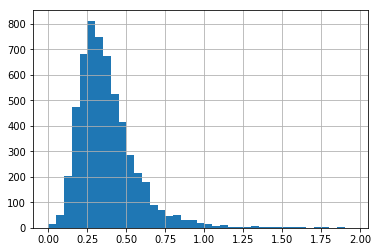

In [57]:
sum_df["GGGGGT"].hist(bins=np.arange(0,2, 0.05))

In [51]:
stat_df.head()

,count,mean,std,min,25%,50%,75%,max
TTTTTT,5710.0,1.406304,5.388102,0.0,0.621378,0.767329,0.971691,238.753739
TTTTTC,5710.0,1.021666,0.402240,0.0,0.752462,1.033372,1.257476,3.122408
TTTTTA,5710.0,2.705516,10.932652,0.0,1.101477,1.434196,2.221359,564.353989
TTTTTG,5710.0,1.480377,1.501629,0.0,0.859170,1.105818,1.583203,37.874822
TTTTCT,5710.0,2.025797,2.556118,0.0,1.030331,1.239174,1.995594,62.739935


## freqs -> pressure(02/06)

5710


,acc,ftp,organism_name,genetic_code
0,GCF_000010525.1,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,Azorhizobium caulinodans ORS 571,11
1,GCF_000007365.1,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,Buchnera aphidicola str. Sg (Schizaphis graminum),11
2,GCF_000007725.1,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,Buchnera aphidicola str. Bp (Baizongia pistaciae),11
3,GCF_000009605.1,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,Buchnera aphidicola str. APS (Acyrthosiphon pi...,11
4,GCF_000090965.1,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,Buchnera aphidicola BCc,11


In [8]:
for _, acc in enumerate(ref_df["acc"]):
    if _ % 100 == 0:
        print(_)
    
    freqs_fp = "./data/freqs/{}.freqs".format(acc)
    out_fp = "./data/pressure/{}.csv".format(acc)
    
    freqs = load_freqs(freqs_fp)
    out_df = calculate_pressure(freqs)
    out_df.to_csv(out_fp, index=False)
    break

0


In [7]:
freqs_fp

'./data/freqs/GCF_000010525.1.freqs'

In [6]:
calculate_pressure(freqs)

,bicodon,freq,pred,pres
0,TTTTTT,17,20.970409,0.810666
1,TTTTTC,88,190.474412,0.462004
2,TTTTTA,4,1.048844,3.813721
3,TTTTTG,24,18.961915,1.265695
4,TTTTCT,27,10.280070,2.626441
5,TTTTCC,270,124.929273,2.161223
6,TTTTCA,27,7.288824,3.704301
7,TTTTCG,111,89.874690,1.235053
8,TTTTAT,39,79.424426,0.491033
9,TTTTAC,35,50.199580,0.697217


In [10]:
freqs = load_freqs(fp)
fp

'./data/freqs/GCF_000010525.1.freqs'

In [1]:
import glob

In [2]:
fps = glob.glob("./data/freqs/*.freqs")
len(fps)

5711

In [5]:
fp = fps[0]


In [ ]:
freqs_fp = "./data/freqs/GCF_000010525.1.freqs"


## モジュールの動作確認&pressureの算出（02/04）

In [29]:
cds_fp = "./data/GCF_900128725.1_BCifornacula_v1.0_cds_from_genomic.fna"
cdss = list(SeqIO.parse(cds_fp, 'fasta'))
freqs = Freqs()
for cds in cdss:
    freqs.update(cds.seq)

length error: not multiple of 3 (1357)
length error: not multiple of 3 (623)
stop error: inframe stop codon found
length error: not multiple of 3 (947)
length error: not multiple of 3 (407)
length error: not multiple of 3 (812)


## freqsからそれぞれのcodonの確率を算出（02/04）

In [9]:
freqs_fp = "./data/freqs/GCF_000010525.1.freqs"
freqs = load_freqs(freqs_fp)

In [10]:
freqs.aa['*']

4723

In [4]:
import itertools

In [11]:
codons = [''.join(_) for _ in itertools.product("TCAG", repeat=3)]

probs = dict()
for codon in codons:
            aa = str(Seq(codon).translate(table=11))
            probs[codon] = freqs.codon[codon] / freqs.aa[aa] if freqs.aa[aa] > 0 else 0
probs

{'AAA': 0.07672873788522269,
 'AAC': 0.6730963359070199,
 'AAG': 0.9232712621147773,
 'AAT': 0.3269036640929801,
 'ACA': 0.033610214709274555,
 'ACC': 0.5788878921677132,
 'ACG': 0.36385241795496115,
 'ACT': 0.023649475168051073,
 'AGA': 0.006185030251889621,
 'AGC': 0.2948471999902247,
 'AGG': 0.02073645846424532,
 'AGT': 0.02265423575556886,
 'ATA': 0.012407319229984354,
 'ATC': 0.893612679409564,
 'ATG': 1.0,
 'ATT': 0.09398000136045168,
 'CAA': 0.07281771983618157,
 'CAC': 0.5645443443245206,
 'CAG': 0.9271822801638184,
 'CAT': 0.43545565567547945,
 'CCA': 0.029226178272853596,
 'CCC': 0.401273377525684,
 'CCG': 0.5217772614410351,
 'CCT': 0.04772318276042734,
 'CGA': 0.020942925366703172,
 'CGC': 0.627031005942656,
 'CGG': 0.2481821935761863,
 'CGT': 0.07692238639831954,
 'CTA': 0.006056307289393278,
 'CTC': 0.40847640525728696,
 'CTG': 0.47519278335515786,
 'CTT': 0.0736092924002134,
 'GAA': 0.2870973880774537,
 'GAC': 0.6791865108000192,
 'GAG': 0.7129026119225462,
 'GAT': 0.320

In [12]:
dct_lst = []
for c1 in codons:
    for c2 in codons:
        bicodon = c1 + c2
        biaa = str(Seq(bicodon).translate(table=11))
        a1 = biaa[0]
        a2 = biaa[1]
        
        dct = {
            "bicodon": bicodon,
            "freq": freqs.bicodon[c1][c2],
            "pred": freqs.biaa[a1][a2] * probs[c1] * probs[c2]
        }
        dct_lst.append(dct)

,bicodon,freq,pred,pres
2603,AATAAG,18,281.296947,0.063989
1069,CTTAGC,15,232.205680,0.064598
2083,ATTATG,7,108.358942,0.064600
179,TTAGTG,1,15.275552,0.065464
2093,ATTAGC,8,120.675919,0.066293
3529,GCGTAC,43,606.655677,0.070880
3528,GCGTAT,70,959.834314,0.072929
456,TCGTAT,25,316.367053,0.079022
2091,ATTAAG,13,155.490110,0.083607
2504,ACGTAT,39,454.134966,0.085878


## cdsファイルから各frequenciesを算出する（02/03）

In [2]:
class Freqs:
    def __init__(self):
        self.codon = Counter()
        self.aa = Counter()
        self.bicodon = defaultdict(lambda: Counter())
        self.biaa = defaultdict(lambda: Counter())
        
    def _is_typical(self, cds_seq):
        """
        Check the following:
        * length is multiple of 3
        * Only ATGC used
        * No premature stop codon included
        """
        
        if len(cds_seq) % 3 != 0:
            print("length error")
            return False
        
        if not(set(cds_seq) <= set("ATGC")):
            print("character error: unknown characters ({}) included".format(','.join(set(cds_seq) - set("ATGC"))))
            return False
        
        pro = cds_seq.translate(table=11)
        if "*" in pro[:-1]:
            print("stop error: inframe stop codon found")
            return False
        
        return True
        
    def update(self, cds_seq):
        """
        Args:
            cds_seq: Bio.Seq object
        """
        
        if not(self._is_typical(cds_seq)):
            return False
    
        pro_seq = cds_seq.translate(table=11)
        codons = [str(cds_seq[3*i:3*(i+1)]) for i in range(int(len(cds_seq)/3))]
        aas = list(cds.seq.translate())
        
        self.codon.update(codons)
        self.aa.update(aas)
        for i in range(len(codons)-1):
            self.bicodon[codons[i]][codons[i+1]] += 1
        for i in range(len(aas) - 1):
            self.biaa[aas[i]][aas[i+1]] += 1

        return True
    

def dump_freqs(freqs, fp):
    dill.dump(freqs, open(fp, "wb"))
    
def load_freqs(fp):
    return dill.load(open(fp, "rb"))

In [3]:
cds_fp = "./data/GCF_900128725.1_BCifornacula_v1.0_cds_from_genomic.fna"
cdss = list(SeqIO.parse(cds_fp, 'fasta'))
len(cdss)

383

In [4]:
freqs = Freqs()
for cds in cdss:
    freqs.update(cds.seq)

length error
length error
stop error: inframe stop codon found
length error
length error
length error


In [6]:
fp = "tmp.freqs"
dump_freqs(freqs, fp)
freqs_new = load_freqs(fp)